# Stcok ML analysis

In this text we try to investigate how Machine Learning can do for price prediciton in stock market or look at a very general idea that what kind of data or pattern we can observe in these type of datas.

## Loading data

We first load the last prices from *IEXTrading* data basis. If you run this step for first time it may take a minute to finish but ig you already executed this step in your last runs, a proper csv file has been created and you can directly got to next step that reads the data from your local directory.

In [7]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NasDaq = ['ATVI','ADBE' , 'AMD', 'ALGN', 'ALXN' , 'AMZN','AMGN','AAL','ADI','AAPL','AMAT','ASML','ADSK','ADP','AVGO'
          ,'BIDU','BIIB' , 'BMRN' , 'CDNS' , 'CELG' , 'CERN' , 'CHKP','CHTR','CTRP' ,'CTAS','CSCO','CTXS','CMCSA'
          ,'COST','CSX','CTSH','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA','GILD','GOOG','GOOGL','HAS'
          ,'HSIC','ILMN','INCY','INTC','INTU','ISRG','IDXX','JBHT','JD','KLAC','KHC','LRCX','LBTYA','LBTYK','LULU'
          ,'MELI','MAR','MCHP','MDLZ','MNST','MSFT','MU','MXIM','MYL','NTAP','NFLX','NTES','NVDA','NXPI','ORLY','PAYX'
          ,'PCAR','BKNG','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC','SNPS','TTWO','TSLA'
          ,'TXN','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WDAY','WLTW','WYNN','XEL','XLNX']
NasDaq.sort()

def getPrice (df):
    n = len(df)
    price = np.zeros(n)
    for i in range (n):
        price[i] = df.iloc[i]['close']
    return price

price = {}
    
for company in NasDaq:
    url = "https://api.iextrading.com/1.0/stock/" + company + "/batch?types=chart&range=2y"
    response = urllib.request.urlopen(url)
    df = pd.DataFrame(data = json.loads(response.read())).chart
    price[company] = getPrice(df)

df = pd.DataFrame(data = price).loc[:,NasDaq]
df.to_csv('stock_data.csv', sep=',')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NasDaq = ['ATVI','ADBE' , 'AMD', 'ALGN', 'ALXN' , 'AMZN','AMGN','AAL','ADI','AAPL','AMAT','ASML','ADSK','ADP','AVGO'
          ,'BIDU','BIIB' , 'BMRN' , 'CDNS' , 'CELG' , 'CERN' , 'CHKP','CHTR','CTRP' ,'CTAS','CSCO','CTXS','CMCSA'
          ,'COST','CSX','CTSH','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA','GILD','GOOG','GOOGL','HAS'
          ,'HSIC','ILMN','INCY','INTC','INTU','ISRG','IDXX','JBHT','JD','KLAC','KHC','LRCX','LBTYA','LBTYK','LULU'
          ,'MELI','MAR','MCHP','MDLZ','MNST','MSFT','MU','MXIM','MYL','NTAP','NFLX','NTES','NVDA','NXPI','ORLY','PAYX'
          ,'PCAR','BKNG','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC','SNPS','TTWO','TSLA'
          ,'TXN','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WDAY','WLTW','WYNN','XEL','XLNX']
NasDaq.sort()

df= pd.read_csv('stock_data.csv').loc[:,NasDaq]

In [13]:
df.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
0,41.5847,134.9767,121.80,79.3911,100.4752,86.69,107.99,124.74,37.4030,14.28,...,79.76,86.34,92.95,81.8485,84.49,71.4621,125.0172,100.5518,40.8811,57.7180
1,40.4462,134.7731,121.44,80.2737,99.6414,85.91,107.48,121.60,37.2376,14.10,...,79.35,86.13,92.74,81.6477,83.96,71.4621,125.1044,100.9374,40.9000,57.4583
2,41.3099,136.1985,122.11,80.1106,100.3123,88.40,110.31,122.12,37.8700,13.98,...,80.07,86.95,94.57,82.0301,83.58,72.4250,126.0256,100.9856,41.6566,58.0355
3,41.3492,136.4215,122.35,79.3528,99.9098,86.73,110.47,122.41,37.9965,13.65,...,80.35,87.44,92.36,81.9058,85.04,72.8215,125.3759,102.3546,41.2121,57.7758
4,40.9468,135.7427,127.01,79.8708,100.7340,86.22,111.85,122.08,38.2203,13.49,...,81.19,86.25,91.92,82.1353,84.96,72.5666,126.0159,106.2301,41.4674,57.8046


We can plot the evoloution of all prices :

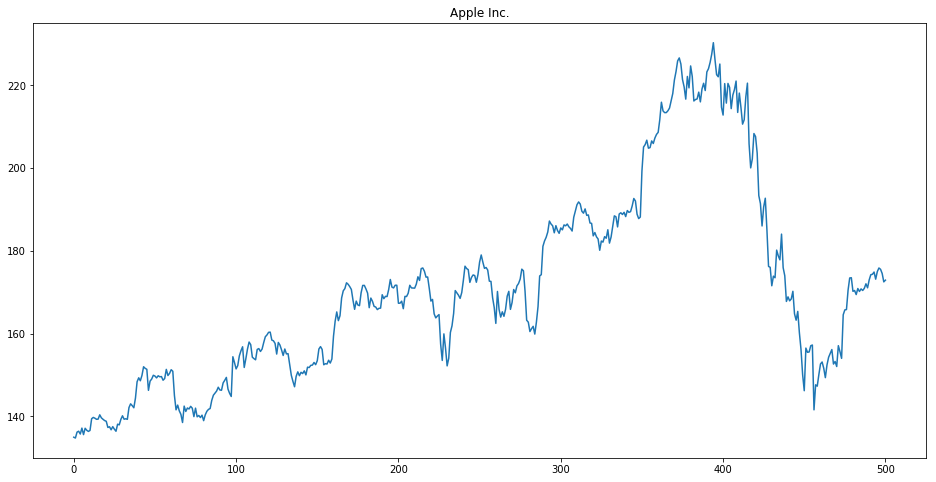

In [15]:
def mplot (price , mtitle=" "):
    plt.figure(figsize=(16,8))
    plt.title(mtitle)
    plt.plot (range(len(price)) , price)
    plt.show()

mplot (df.AAPL , mtitle ="Apple Inc." )

### Simple Linear Regression 
We aim to look at different analysis one can apply for these type of datas. For example, as a first quesiton we might ask, 

#### Q1

can we write a price of given stock, let say Google (with Nasdaq `googl`), as a linear combination of other stock prices. 

For answering that, we apply a simple linear regression model :

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def myLR (X , y , name= " " , samplenumber=255):
    
    
    # We forget the fact they data samples are ordered and they are time series
    #X_train, X_test, y_train, y_test = train_test_split(X, y
    #                                                    , test_size=0.2, random_state=0)

    X_train = X[0:samplenumber , :]
    X_test = X[samplenumber: , :]
    y_train = y[0:samplenumber]
    y_test = y[samplenumber:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #y_pred = model.predict(X_test)
    y_pred = model.predict(X)

    plt.figure(figsize=(16,8))
    plt.plot (range(len(y)) , np.append(y_train , y_test) )
    #plt.plot (range(len(y)) , np.append(y_train , y_pred) )
    plt.plot (range(len(y)) , y_pred )
    plt.show()
    print("We can predict the stock of company " + name 
     + " with linear regression and the score of the prediction is " + str(score)
     + ".")

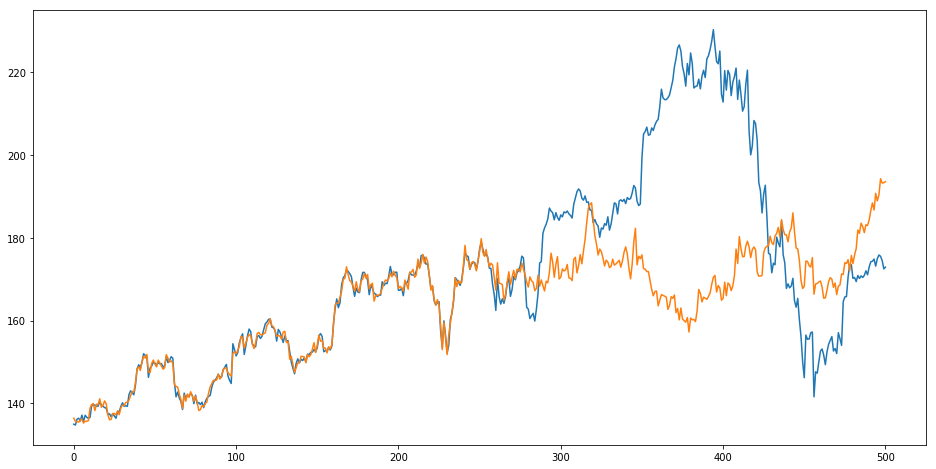

We can predict the stock of company AAPL with linear regression and the score of the prediction is -0.661154245272068.


In [35]:
name = 'AAPL'
y = np.array ( df.loc[:,[name]] )
NasDaqMinusName = [company for company in NasDaq if company !=name]
X = np.array ( df.loc[:,NasDaqMinusName] )
myLR(X,y,name)

Interesting, non ?! It means with linear regression we have fitted very well on the train data whilst we cannot do that much prediction about the behaviour of the desired stock in the test set. So we might think there are some sort of over fitting in the learning. Let us try againn linear regression with an additional regularising term:

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def myLRRidge (X , y , name= " " , samplenumber=255):
    
    
    # We forget the fact they data samples are ordered and they are time series
    #X_train, X_test, y_train, y_test = train_test_split(X, y
    #                                                    , test_size=0.2, random_state=0)

    X_train = X[0:samplenumber , :]
    X_test = X[samplenumber: , :]
    y_train = y[0:samplenumber]
    y_test = y[samplenumber:]

    model = Ridge(alpha=0.0)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #y_pred = model.predict(X_test)
    y_pred = model.predict(X)

    plt.figure(figsize=(16,8))
    plt.plot (range(len(y)) , np.append(y_train , y_test) )
    #plt.plot (range(len(y)) , np.append(y_train , y_pred) )
    plt.plot (range(len(y)) , y_pred )
    plt.show()
    print("We can predict the stock of company " + name 
     + " with linear regression and the score of the prediction is " + str(score)
     + ".")

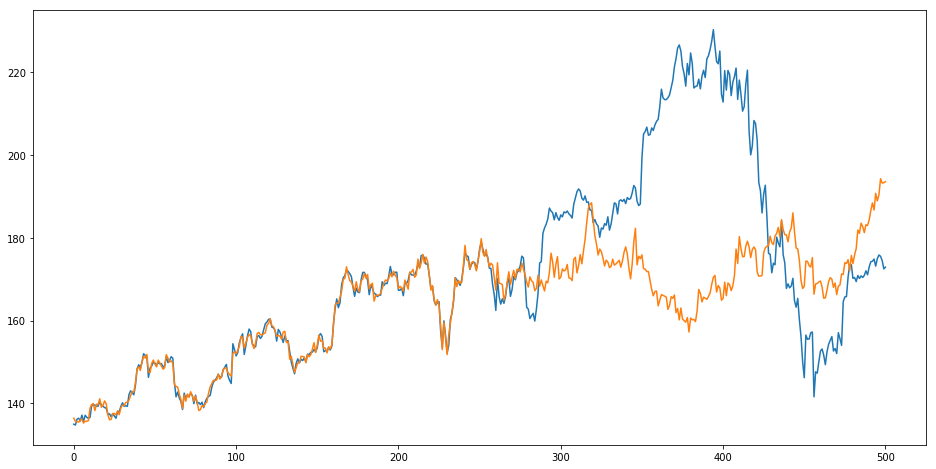

We can predict the stock of company AAPL with linear regression and the score of the prediction is -0.6611542452753099.


In [77]:
name = 'AAPL'
y = np.array ( df.loc[:,[name]] )
NasDaqMinusName = [company for company in NasDaq if company !=name]
X = np.array ( df.loc[:,NasDaqMinusName] )
myLRRidge(X,y,name)

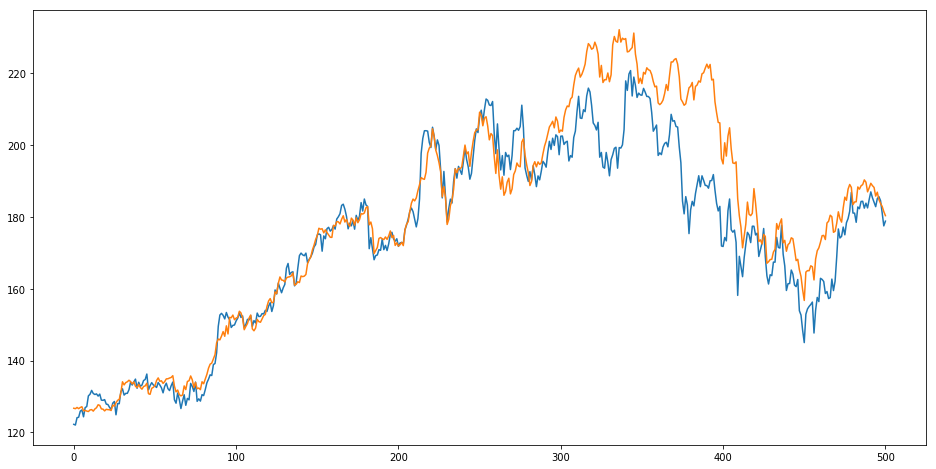

We can predict the stock of company ASML with linear regression and the score of the prediction is 0.24178400238933062.


In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

def myLRLasso (X , y , name= " " , samplenumber=255):
    
    
    # We forget the fact they data samples are ordered and they are time series
    #X_train, X_test, y_train, y_test = train_test_split(X, y
    #                                                    , test_size=0.2, random_state=0)

    X_train = X[0:samplenumber , :]
    X_test = X[samplenumber: , :]
    y_train = y[0:samplenumber]
    y_test = y[samplenumber:]

    model = Lasso(alpha=10)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #y_pred = model.predict(X_test)
    y_pred = model.predict(X)

    plt.figure(figsize=(16,8))
    plt.plot (range(len(y)) , np.append(y_train , y_test) )
    #plt.plot (range(len(y)) , np.append(y_train , y_pred) )
    plt.plot (range(len(y)) , y_pred )
    plt.show()
    print("We can predict the stock of company " + name 
     + " with linear regression and the score of the prediction is " + str(score)
     + ".")

name = 'ASML'
y = np.array ( df.loc[:,[name]] )
NasDaqMinusName = [company for company in NasDaq if company !=name]
X = np.array ( df.loc[:,NasDaqMinusName] )
myLRLasso(X,y,name)

Let us play a bit around. Let us raise this new question:

#### Q2

If we know the state of the market for today (the prices of the sotcks) but the price of a given stock, and if we know the price of the day before of this stock, can we predict something ?


Let's build our data to answer this question:


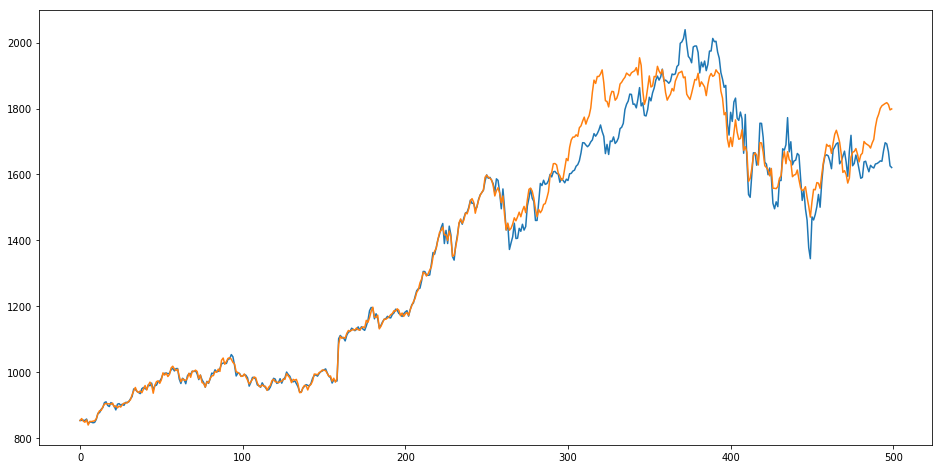

We can predict the stock of company AMZN with linear regression and the score of the prediction is 0.7446491592470077.


In [92]:
def myLaggedLR (X , y , name , k=0 , samplenumber=255 ):
    a , b = X.shape
    X_new = np.zeros ([a-k , b+k])
    for i in range ( k,  len (X) ):
        X_new[i-k] = np.append(X[i] , y[i-k:i])
    y_new = y[k:] 
    myLR (X_new , y_new, name , samplenumber)
name = 'AMZN'
y = np.array ( df.loc[:,[name]] )
X = np.array ( df.loc[:,[company for company in NasDaq if company !=name]] )
myLaggedLR (X , y , name , k=1)

Let see if we smooth the data we obtain beter results:

In [94]:
def smoothing (price , k=10):
    priceSmoothed = np.empty_like (price)
    for i in range (len (price)):
        priceSmoothed [i] = np.average ( price[i: min(i+k ,len (price))] )
    return priceSmoothed
def smoothingMatrix (X , k=10):
    XSmoothed = np.empty_like (X)
    
    for col in range ( X.shape[1]):
        XSmoothed[:,col] = smoothing (X[:,col] , k)
    return XSmoothed    

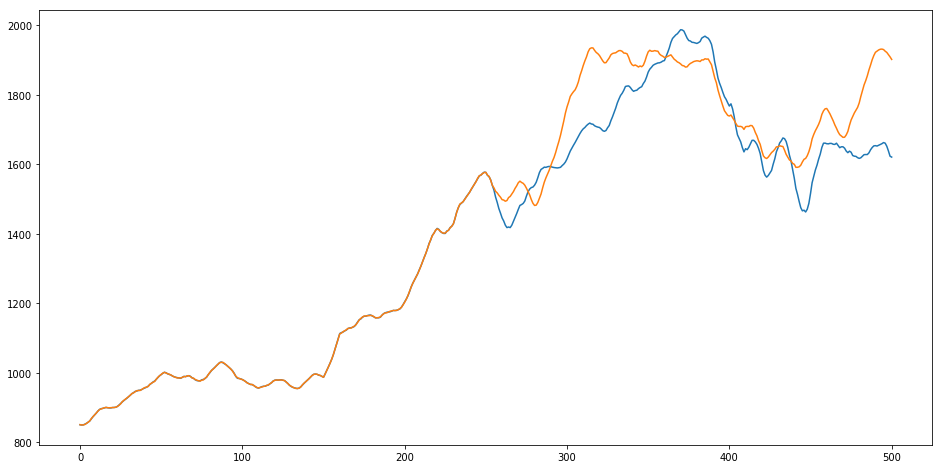

We can predict the stock of company AMZN with linear regression and the score of the prediction is 0.3716050253055113.


In [95]:
name = 'AMZN'
y = np.array ( df.loc[:,[name]] )
X = np.array ( df.loc[:,[company for company in NasDaq if company !=name]] )
smoothingcoef = 10
XSmoothed , ySmoothed = smoothingMatrix(X,k=smoothingcoef) , smoothingMatrix(y,k=smoothingcoef)
myLR (XSmoothed , ySmoothed , name)

As you can see smoothing does not necessarily gives us better predictions.

Let us refere us to a second approach. The question if we can classify the different stock prices. Stocks do not keep their behaviour, so the answer of this question may vary during time. 

In [30]:
def slidingCorrl (price1 , price2 , k=100):
    n = len(price1)
    correl = np.zeros(n-k+1)
    for i in range (n-k+1):
        correl[i] = np.corrcoef (price1 [i:i+k-1] , price2 [i:i+k-1])[0][1]
    return correl

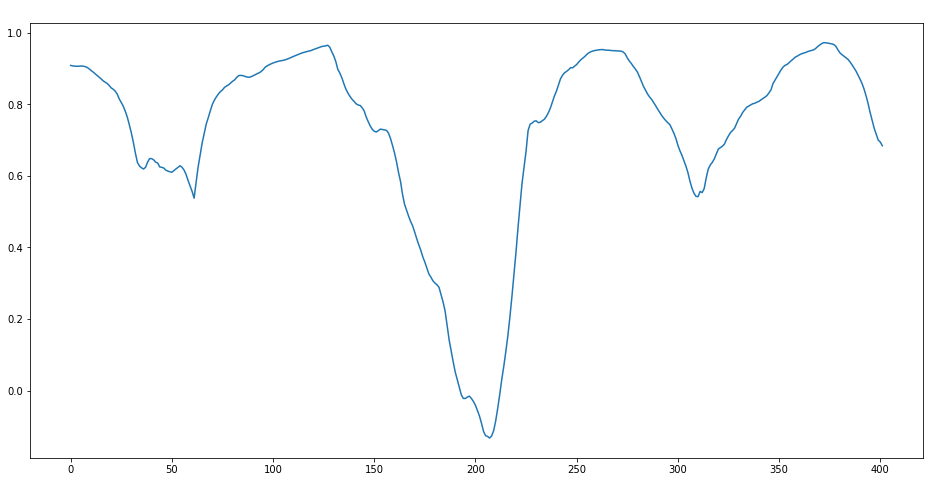

In [32]:
correl = slidingCorrl (df.GOOGL , df.AMZN)
mplot (correl)

The traders are interested more in the change percentages instead of the price itself.

## Clustering 

We will see in the following that we can devide up the set of stocks in two groups such that in each, they have a similar behviour. The correlation of every paire of stock in same group is positive whilst it is negative if they belong to different groups. 

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

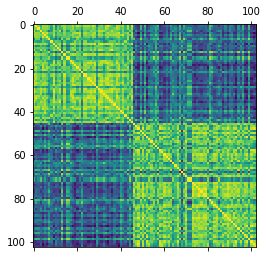

In [151]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X=df.iloc[:30].corr()

X_reduced = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(12, 12))
y_pred = KMeans(n_clusters=2).fit_predict(X_reduced)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)
#plt.title("Clustering stocks")


NewNasDaq = [NasDaq[i] for i in range(103) if y_pred[i]==1] + [NasDaq[i] for i in range(103) if y_pred[i]==0]
Newdf = df.loc[:,NewNasDaq]
plt.figure(figsize=(12, 12))
plt.matshow(Newdf.iloc[:30].corr())
plt.show()
